In [1]:
path='G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Patrick's google file stream path

import LSDpy.lsdpy
import specpolFlow as pol


import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import itertools

import pyRaven as rav

loading specpolFlow package


In [2]:
#Accessing the google sheets

sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [3]:
StarData

,HD,Name,Nobs,T,log(g),ModelCode,Adopted-vsini,Halpha shape,Notes,BadvsiniFlag,...,pyRavenFlag,AsifgoodFlag,TweakgoodFlag,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,6226.0,hd6226,1.0,15000.0,4.0,T15000g40,120.00,absorption,"no disk during observation, rotational modulat...",1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7636.0,hd7636,2.0,15000.0,4.0,T15000g40,220.00,asymetric single,binary? no tess observation,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10144.0,hd10144,1.0,20000.0,3.5,T20000g35,245.31,bowl,binary or pulsator,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10516.0,hd10516,1.0,25000.0,4.0,T25000g40,382.04,asymetric double,sdO companion https://iopscience.iop.org/artic...,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11415.0,hd11415,1.0,18000.0,4.0,T18000g40,48.00,absorption,not a binary https://iopscience.iop.org/articl...,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,221507.0,hd221507,1.0,10500.0,4.0,T10500g40,40.00,absorption,Not a Be star,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,224686.0,hd224686,2.0,13000.0,4.0,T13000g40,286.16,shell,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,239712.0,hd239712,1.0,21000.0,4.0,T21000g40,304.86,asymetric double,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,bd-134933,1.0,30000.0,4.0,T30000g40,239.56,single,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
genparam = {
    'lambda0':5000,    # the central wavelength of the transition
    'vsini':290,         # the projected rotational velocity  MAKE SURE THIS IS THE VSINI OF YOUR STAR
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':0.98,          # the line strength parameter
    'ndop':int(10),       # the number of sample point per doppler width for the wavelength array
  }

weakparam = {
        'geff':1.0 
    }

gridparam = {
    'Bpole_grid': np.linspace(0,5000,25),
    'incl_grid': np.linspace(0,180,18),
    'beta_grid': np.linspace(0,180,18),
    'phase_grid': np.linspace(0,360,18*2),
    'noise_grid': np.arange(0.1,2.1,0.1)
}

# The actual dictionary
param={'general' : genparam,
       'weak' : weakparam,
       'grid':gridparam
       }

In [6]:
star='hd239712'

param
fname='{}05-RavenSetup/hybrid_maskdepth0.02_tellClean/{}.h5'.format(path,star)
datapacket=rav.data.read_packet(fname)

out=rav.loop_speed.loop_speed(param,datapacket,path='{}06-Raven-calculations/test/'.format(path)) #could take a while depending on how fast your computer is

In [7]:
folder='{}06-Raven-calculations/test'.format(path)
rav.BayesObjects.create_lnLH_pars_from_chi(folder,param,datapacket)


C:\Users\pjsta\MyPythonPrograms\pyRaven\BayesObjects.py:379: RuntimeWarning: divide by zero encountered in log
  prior_incl = np.log(get_prior_incl(self.incl_arr))
C:\Users\pjsta\MyPythonPrograms\pyRaven\BayesObjects.py:408: RuntimeWarning: divide by zero encountered in log
  ln_post_mar = np.log(post_mar)-np.log(total_sum)


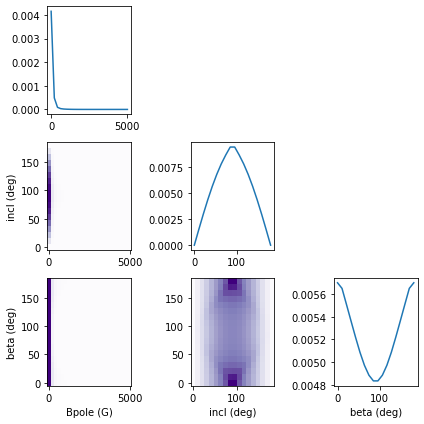

In [9]:
lnLH = rav.BayesObjects.read_lnLH_pars('lnLH_PARS_V_obs0.h5')
lnLH_prior = lnLH.apply_priors()
post = lnLH_prior.mar_phase_noise()

fig, ax = post.plot_corner()

C:\Users\pjsta\AppData\Local\Temp/ipykernel_27792/1932687087.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(chi.Bpole_arr, chi.beta_arr, chi.data[:,:,phi],
C:\Users\pjsta\AppData\Local\Temp/ipykernel_27792/1932687087.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1)


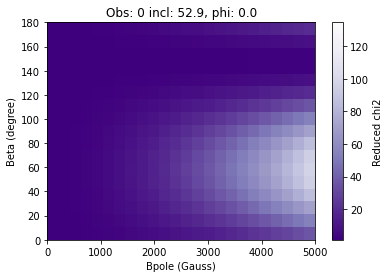

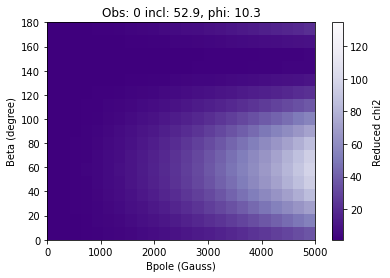

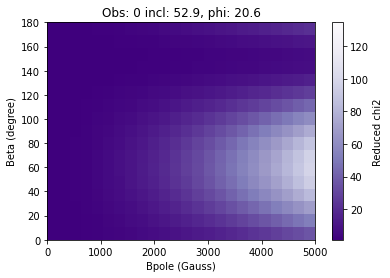

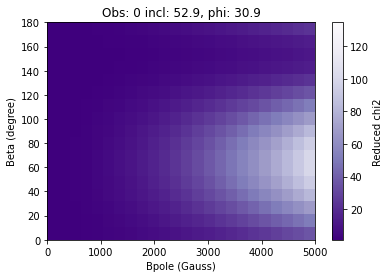

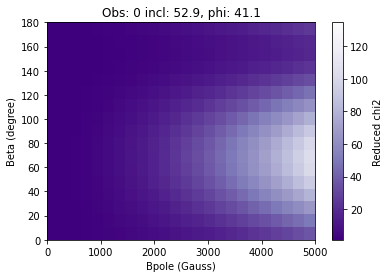

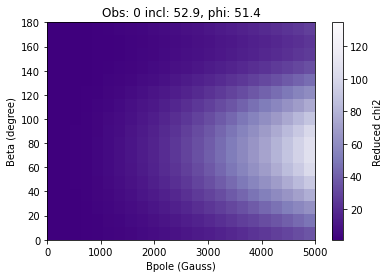

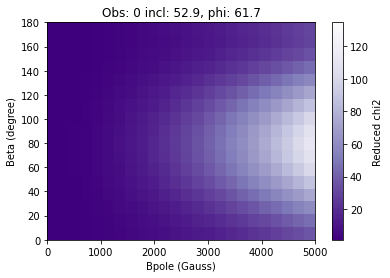

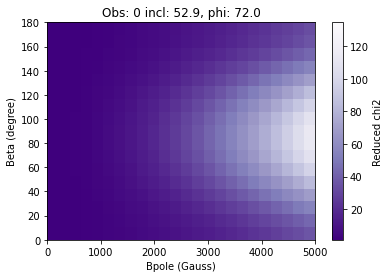

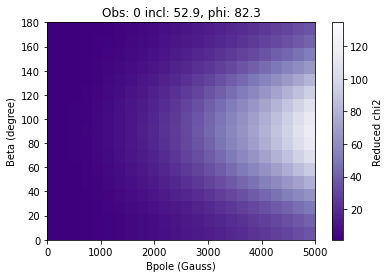

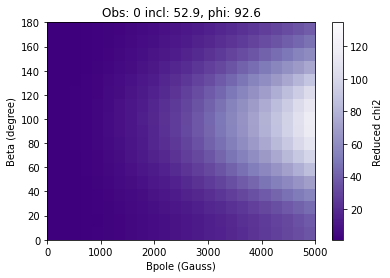

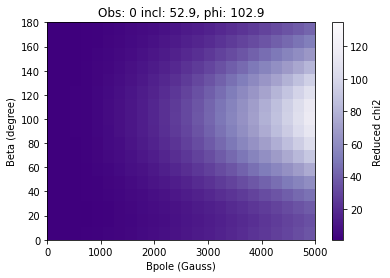

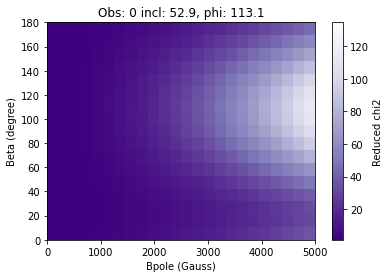

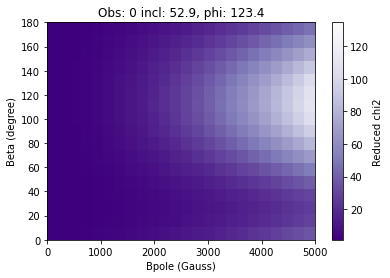

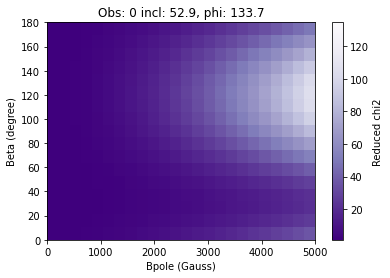

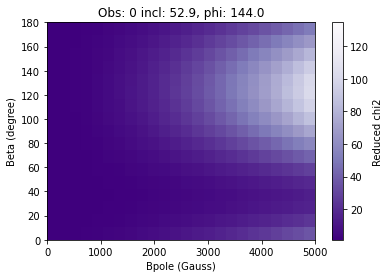

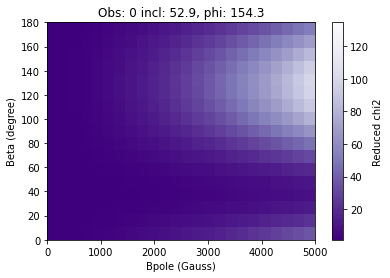

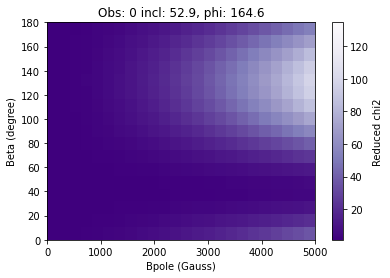

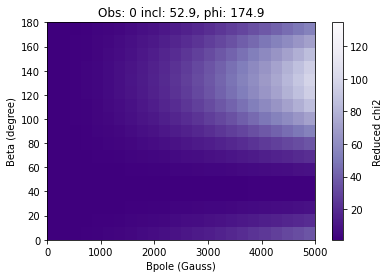

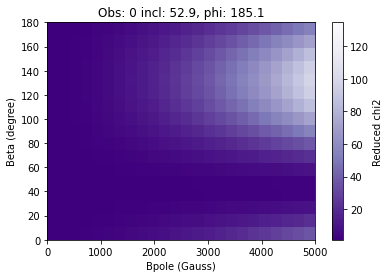

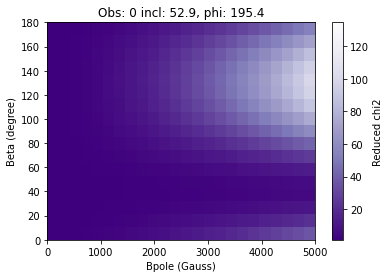

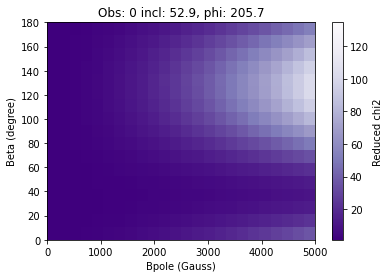

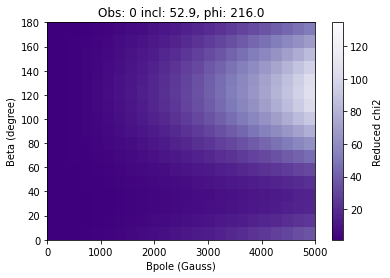

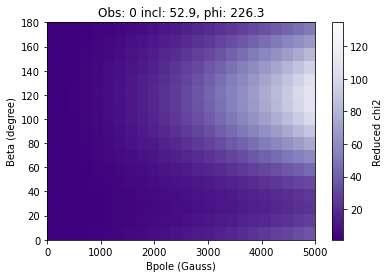

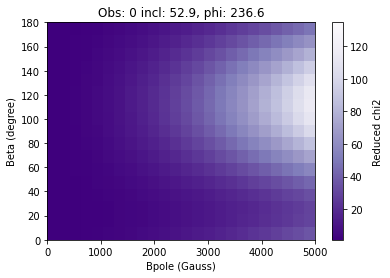

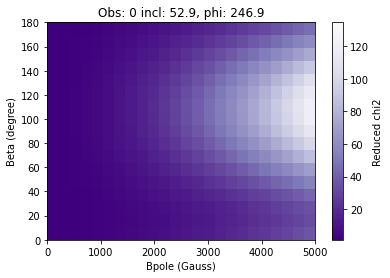

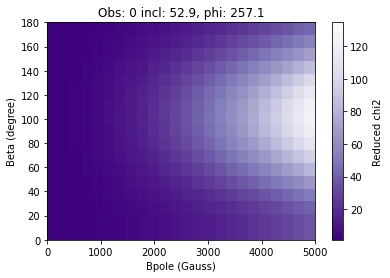

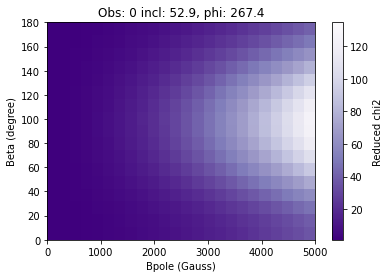

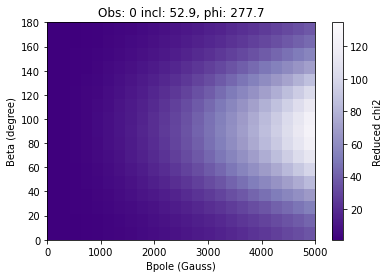

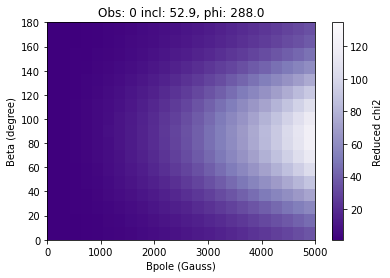

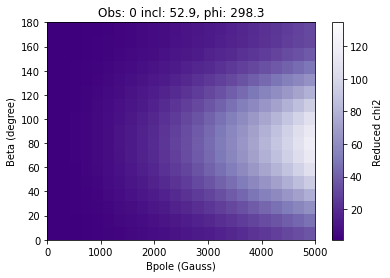

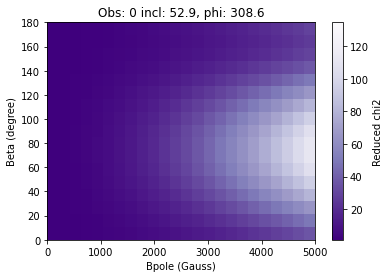

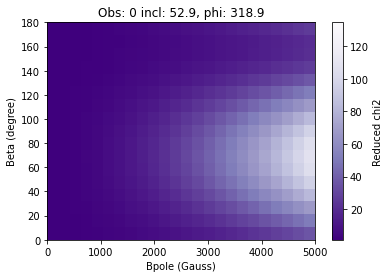

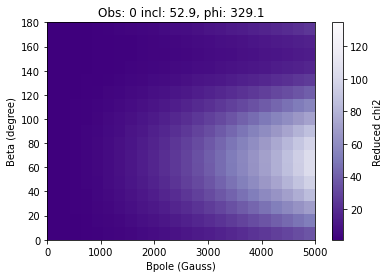

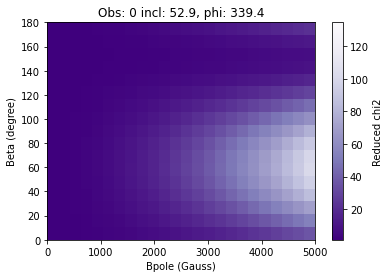

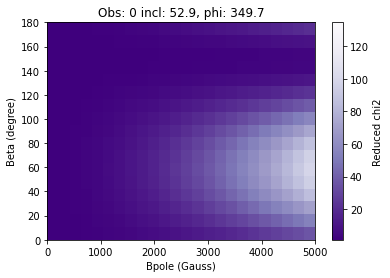

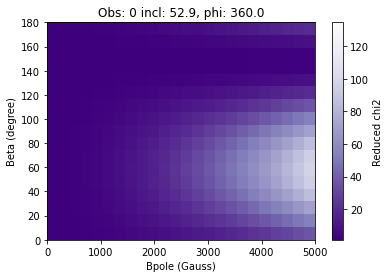

In [13]:
i = 5
o = 0

chi = rav.BayesObjects.read_chi('{}06-Raven-calculations/test/chiV_i{}obs{}.h5'.format(path,i,o))
chi.data = chi.data / datapacket.cutfit.lsds[o].vel.size


for phi, label in enumerate(chi.phi_arr):

    fig, ax = plt.subplots(1,1)
    im = ax.pcolormesh(chi.Bpole_arr, chi.beta_arr, chi.data[:,:,phi], 
                        cmap='Purples_r', vmin=np.min(chi.data), vmax=np.max(chi.data))
    co = plt.colorbar(im)
    co.ax.set_ylabel('Reduced chi2')
    ax.set_xlabel('Bpole (Gauss)')
    ax.set_ylabel('Beta (degree)')
    ax.set_title('Obs: {} incl: {:3.1f}, phi: {:3.1f}'.format(o,param['grid']['incl_grid'][i],chi.phi_arr[phi]))
    fig.savefig('{}06-Raven-calculations/test/fig_chi/fig{:0>3}.png'.format(path,phi))